# Fundamentals of ML

In [9]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(f"{tf.__version__ = }")

tf.__version__ = '2.6.1'


## Spurious correlations

Lets train on mnist twice, once adding random noise, once adding zeros

In [6]:
from tensorflow.keras.datasets import mnist

# load
(train_images, train_labels), _ = mnist.load_data()

# simple prep
train_images = train_images.reshape((-1, 28 * 28)).astype("float32") / 255
print(f"{train_images.shape = }")

train_images.shape = (60000, 784)


In [8]:
noise = np.random.random((len(train_images), 784))
zeros = np.zeros_like(noise)

train_images_w_zeros = np.concatenate((train_images, zeros), axis=1)
train_images_w_noise = np.concatenate((train_images, noise), axis=1)

print(f"{train_images_w_zeros.shape = }")
print(f"{train_images_w_noise.shape = }")

train_images_w_zeros.shape = (60000, 1568)
train_images_w_noise.shape = (60000, 1568)


In [12]:
def get_model():
    model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )

    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [16]:
model = get_model()
history_noise = model.fit(train_images_w_noise, train_labels, epochs=30, batch_size=128, validation_split=.2)

model = get_model()
history_zeros = model.fit(train_images_w_zeros, train_labels, epochs=30, batch_size=128, validation_split=.2)

Epoch 1/30
375/375 [==============================] - 2s 4ms/step - loss: 0.6420 - accuracy: 0.8105 - val_loss: 0.2603 - val_accuracy: 0.9194
Epoch 2/30
375/375 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9216 - val_loss: 0.1875 - val_accuracy: 0.9463
Epoch 3/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1633 - accuracy: 0.9492 - val_loss: 0.1598 - val_accuracy: 0.9505
Epoch 4/30
375/375 [==============================] - 1s 3ms/step - loss: 0.1146 - accuracy: 0.9644 - val_loss: 0.1364 - val_accuracy: 0.9588
Epoch 5/30
375/375 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9730 - val_loss: 0.1290 - val_accuracy: 0.9625
Epoch 6/30
375/375 [==============================] - 1s 3ms/step - loss: 0.0625 - accuracy: 0.9798 - val_loss: 0.1264 - val_accuracy: 0.9653
Epoch 7/30
375/375 [==============================] - 1s 3ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.1265 - val_accuracy: 0.9691
Epoch 

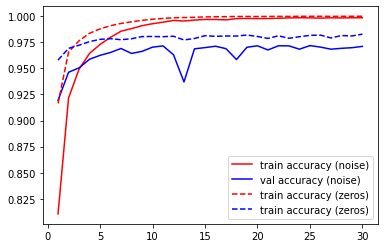

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
epoch_range = range(1, 31)

plt.plot(epoch_range, history_noise.history['accuracy'], 'r-', label="train accuracy (noise)")
plt.plot(epoch_range, history_noise.history['val_accuracy'], 'b-', label="val accuracy (noise)")
plt.plot(epoch_range, history_zeros.history['accuracy'], 'r--', label="train accuracy (zeros)")
plt.plot(epoch_range, history_zeros.history['val_accuracy'], 'b--', label="train accuracy (zeros)")

plt.legend()
plt.show()

## Fiting a model on random data

In [21]:
random_labels = train_labels.copy() # not random yet
np.random.shuffle(random_labels) # now they are random

model = get_model()

random_history = model.fit(train_images, random_labels, epochs=100, batch_size=128, validation_split=.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3162 - accuracy: 0.1028 - val_loss: 2.3055 - val_accuracy: 0.1066
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2999 - accuracy: 0.1160 - val_loss: 2.3141 - val_accuracy: 0.1073
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2913 - accuracy: 0.1288 - val_loss: 2.3220 - val_accuracy: 0.1041
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2782 - accuracy: 0.1346 - val_loss: 2.3223 - val_accuracy: 0.1074
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2609 - accuracy: 0.1515 - val_loss: 2.3384 - val_accuracy: 0.1058
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2406 - accuracy: 0.1663 - val_loss: 2.3480 - val_accuracy: 0.1045
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2165 - accuracy: 0.1813 - val_loss: 2.3604 - val_accuracy: 0.1062

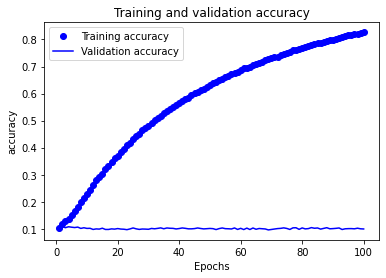

In [22]:
from plot_utils import plot_history

plot_history(random_history, "accuracy")